### Introduction to K - Nearest Neighbor Model with implementation
- It is supervised machine learning model 
- KNN model can be used to predict classification and regression problem 
- K is a number which calculates number of nearest datapoints in the model and then predict the outcome with higest number of features in distance zone 
    - If K = 5, it will calculate 5 nearest data - points distance and then classfiy out with higest number of similar features datapoints 
- KNN algorithm, map's out the regions in area wise for classification problem 

In [2]:
#Importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### About Dataset 
Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible service categories that correspond to the four customer groups, as follows:

1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

Our objective is to build a classifier to predict the service category for unknown cases.

In [3]:
#Data Collection
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv"

df = pd.read_csv(url)
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


### Data Analysis 
- Analyzing dataset based on the target variable(study variable) `custcat`


In [4]:
#Data Visualization
df.info()
df.describe()
df['custcat'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

<Axes: >

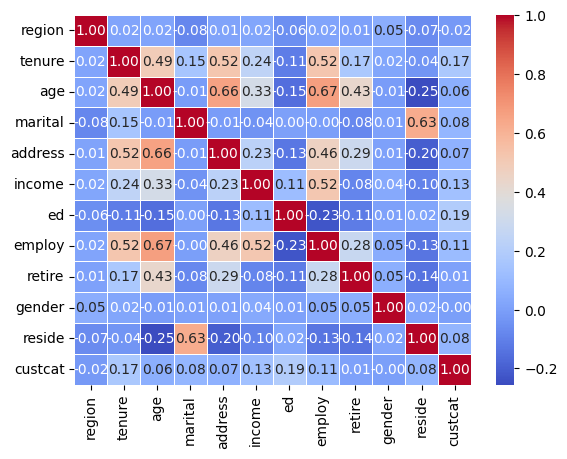

In [5]:
#Correlation of features with target values 
corr_features = df.corr()

#Visualize Correlation map using Default: Pearson method 
plt.Figure(figsize= (10, 8))
sns.heatmap(corr_features, annot= True, cmap= 'coolwarm', fmt = '.2f', linewidths= 0.7)

In [6]:
#Check which features are higly correlated with target variable 
correlation = df.corr()[['custcat']].drop(['custcat'])

#In correlation matrix region, gender & retire is not very correlated with target variable
#Feature Selection
featured_df = df.drop(['region', 'retire', 'gender'], axis= 1)

In [7]:
#Data Pre-processing
from sklearn.preprocessing import StandardScaler, normalize

Y = df['custcat']

X = featured_df.drop(['custcat'], axis= 1)

#Standarization
standard_x = StandardScaler().fit_transform(X)

#Normalization
normalized_x = normalize(standard_x, norm= 'l1', copy= False)


In [8]:
#Model Selection 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(normalized_x, Y, test_size= 0.2, random_state= 42)

In [9]:
#Model Development 
from sklearn.neighbors import KNeighborsClassifier

k = 4
classifier = KNeighborsClassifier(n_neighbors= k)

k_nn = classifier.fit(x_train, y_train)

In [10]:
#Model Prediction and Evaluation
from sklearn.metrics import accuracy_score

#Model Prediction
yhat = k_nn.predict(x_test)

#Model Evaluation
print(f"KNN Model Accuracy: {accuracy_score(y_test, yhat) * 100}%")

KNN Model Accuracy: 37.0%


In [13]:
#Finding optimized value of k for better model accuracy 
k_value = 10
model_accuracy = np.zeros(k_value)
model_deviation = np.zeros(k_value)

for n in range (1, k_value + 1):
    #Model Prediction 
    knn = KNeighborsClassifier(n_neighbors= n)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)

    #Model evaluation
    model_accuracy[n - 1] = np.round(accuracy_score(y_test, y_predict), 3)
    model_deviation[n - 1] = np.std(y_predict == y_test) / np.sqrt(y_predict.shape[0])


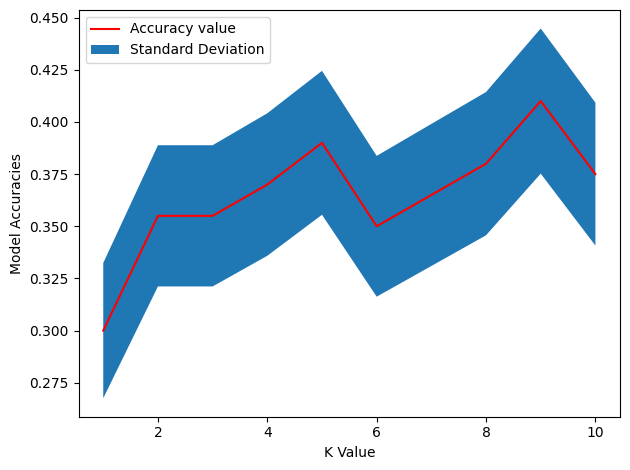

In [23]:
#Visualization of different values of k accuracy and standard deviation
plt.plot(range(1, k_value + 1), model_accuracy, 'r')
plt.fill_between(range(1, k_value + 1), model_accuracy - 1 * model_deviation, model_accuracy + 1 * model_deviation)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.xlabel("K Value")
plt.ylabel("Model Accuracies")
plt.tight_layout()
plt.show()

In [29]:
#Model with max accuracy will be 

print(f"Model with high accuracy score {model_accuracy.max() * 100}%. It's k value is {model_accuracy.argmax() + 1}")

Model with high accuracy score 41.0%. It's k value is 9
